In [19]:
import numpy as np
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor


import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [20]:
df=pd.read_csv('C:\\Users\\Mamidi Dikshitha\\Dropbox\\My PC (DESKTOP-3K30OSM)\\Downloads\\propulsion.csv')
df.head()

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [21]:
df = df.dropna()

In [22]:
df.head()

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
0,0,9.300,27.0,72762.205,3560.393,9753.812,644.806,644.806,1086.583,288.0,780.304,4.523,0.998,22.879,1.050,90.435,1.790,0.973,0.978
1,1,6.175,18.0,29760.552,2306.825,8780.012,246.011,246.011,776.921,288.0,665.511,2.518,0.998,13.438,1.030,34.596,0.685,0.995,0.975
2,2,3.144,9.0,8375.774,1386.739,7051.621,60.318,60.318,589.764,288.0,580.587,1.392,0.998,7.566,1.020,12.477,0.247,0.980,0.978
3,3,3.144,9.0,8377.589,1386.748,7098.469,60.339,60.339,570.651,288.0,576.565,1.390,0.998,7.409,1.021,11.678,0.231,0.984,1.000
4,4,6.175,18.0,29761.091,2306.825,8782.024,246.021,246.021,769.855,288.0,663.682,2.518,0.998,13.374,1.031,34.154,0.676,0.998,0.980


In [23]:
df.describe()

,Unnamed: 0,Lever position (lp) [ ],Ship speed (v) [knots],Gas Turbine shaft torque (GTT) [kN m],Gas Turbine rate of revolutions (GTn) [rpm],Gas Generator rate of revolutions (GGn) [rpm],Starboard Propeller Torque (Ts) [kN],Port Propeller Torque (Tp) [kN],HP Turbine exit temperature (T48) [C],GT Compressor inlet air temperature (T1) [C],GT Compressor outlet air temperature (T2) [C],HP Turbine exit pressure (P48) [bar],GT Compressor inlet air pressure (P1) [bar],GT Compressor outlet air pressure (P2) [bar],Gas Turbine exhaust gas pressure (Pexh) [bar],Turbine Injecton Control (TIC) [%],Fuel flow (mf) [kg/s],GT Compressor decay state coefficient.,GT Turbine decay state coefficient.
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5.150075,14.951400,27100.647714,2131.151788,8194.182366,225.957785,225.957785,734.476178,288.0,645.748980,2.345732,9.980000e-01,12.262597,1.029402,33.480715,0.659100,0.975021,0.987455
std,2886.89568,2.624015,7.740467,22062.780307,772.211732,1090.569425,199.737886,199.737886,173.009157,0.0,72.483036,1.081038,2.236101e-13,5.320817,0.010353,25.721725,0.504791,0.014734,0.007510
min,0.00000,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,444.731000,288.0,540.999000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.950000,0.975000
25%,2499.75000,3.144000,9.000000,8375.791500,1386.758000,7056.520500,60.317000,60.317000,589.841000,288.0,577.980750,1.389000,9.980000e-01,7.445000,1.020000,13.534000,0.246000,0.962000,0.981000
50%,4999.50000,5.140000,15.000000,21630.133500,1924.325000,8480.527000,175.264000,175.264000,705.351000,288.0,636.800000,2.082000,9.980000e-01,11.086000,1.026000,25.249500,0.496000,0.975000,0.987000
75%,7499.25000,7.148000,21.000000,39000.710250,2678.078000,9132.132500,332.360000,332.360000,833.154750,288.0,693.656750,2.981000,9.980000e-01,15.649000,1.036000,44.500000,0.881000,0.988000,0.994000
max,9999.00000,9.300000,27.000000,72783.338000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.000000,1.000000


In [24]:
df.shape

(10000, 19)

In [25]:
x=df.iloc[:,2:]
y=df.iloc[:,1]

In [26]:
model = ExtraTreesRegressor()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)

print("Number of Features: ", fit.n_features_)
print("Selected Features: ", fit.support_)
print("Feature Ranking: ", fit.ranking_) 

C:\Users\Mamidi Dikshitha\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features:  3
Selected Features:  [ True False False False False  True False False False  True False False
 False False False False False]
Feature Ranking:  [ 1  4  2  6  3  1 10 14  9  1 15  5  7 11  8 12 13]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002017B7424C0>,
      dtype=object)

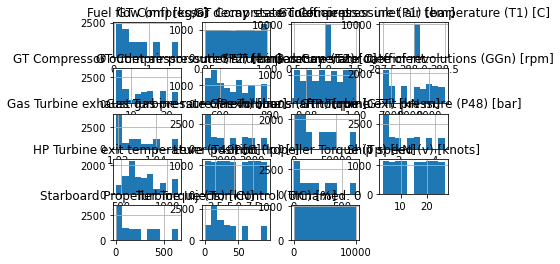

In [27]:
df.hist()

In [28]:
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.2)

num_instances = len(x)

models = []
models.append(('LiR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))


results = []
names = []
scoring = []
for name, model in models:
    model.fit(x_Train, y_Train)
    
    predictions = model.predict(x_Test)
    score = explained_variance_score(y_Test, predictions)
    mae = mean_absolute_error(predictions, y_Test)
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

LiR: 0.999984 (0.008774)
Ridge: 0.999976 (0.010660)
Bag_Re: 1.000000 (0.000000)
RandomForest: 1.000000 (0.000000)
ExtraTreesRegressor: 1.000000 (0.000000)
KNN: 0.999793 (0.003895)
CART: 1.000000 (0.000000)


Extra Trees Regressor' and 'Random Forest Regressor' are the best estimators/models for for predicting 'gt_c_decay'. 